# Load LeNet Model
- some famous models have already been distributed together with the package
- we provide some tools to look into the models

In [1]:
%pylab inline
from tfs.models import LeNet
net = LeNet()

Populating the interactive namespace from numpy and matplotlib


# Build the network
- before we use the network object, we need to `build()` it first. 
- by default, any network object only contains definitions about the network.  we need to call build() function to construct the computational graph.

In [2]:
netout = net.build()
print netout

Tensor("prob:0", shape=(?, 10), dtype=float32)


# Explore the network object

- we can see the network structure easily

In [3]:
print net

Conv2d(knum=20,biased=True,group=1,name=conv1,activation=None,padding=VALID,strides=[1, 1],ksize=[5, 5])
MaxPool(padding=VALID,strides=[2, 2],ksize=[2, 2],name=pool1)
Conv2d(knum=50,biased=True,group=1,name=conv2,activation=relu,padding=VALID,strides=[1, 1],ksize=[5, 5])
MaxPool(padding=VALID,strides=[2, 2],ksize=[2, 2],name=pool2)
FullyConnect(outdim=500,activation=relu,name=ip1)
FullyConnect(outdim=10,activation=None,name=ip2)
Softmax(name=prob)


In [4]:
print net.print_shape()

conv1(Conv2d)               (?, 28, 28, 1) -> (?, 24, 24, 20)     
pool1(MaxPool)             (?, 24, 24, 20) -> (?, 12, 12, 20)     
conv2(Conv2d)              (?, 12, 12, 20) -> (?, 8, 8, 50)       
pool2(MaxPool)               (?, 8, 8, 50) -> (?, 4, 4, 50)       
ip1(FC)                      (?, 4, 4, 50) -> (?, 500)            
ip2(FC)                           (?, 500) -> (?, 10)             
prob(Softmax)                      (?, 10) -> (?, 10)             
None


- each network object also has the following components binding with it:
  - initializer
  - loss
  - optimizer

In [5]:
print net.initializer

DefaultInitializer
-----param-----

-----nodes-----
conv1
    conv1/weights:0     xavier(seed=None,uniform=True,mode=FAN_AVG,factor=1.0)
    conv1/biases:0      constant(val=0.1)
pool1
conv2
    conv2/biases:0      constant(val=0.1)
    conv2/weights:0     xavier(seed=None,uniform=True,mode=FAN_AVG,factor=1.0)
pool2
ip1
    ip1/weights:0       xavier(seed=None,uniform=True,mode=FAN_AVG,factor=1.0)
    ip1/biases:0        constant(val=0.1)
ip2
    ip2/biases:0        constant(val=0.1)
    ip2/weights:0       xavier(seed=None,uniform=True,mode=FAN_AVG,factor=1.0)
prob


In [6]:
print net.losser

CrossEntropy (ip2)
-----param-----
----------------


In [7]:
print net.optimizer

AdamOptimizer
-----param-----
learning_rate=0.001
---------------


# Load and explore the data
- after we have construct the model, what we need to do next is to load data.
- our package has provided some frequently used dataset, such as Mnist, and Cifar10

In [8]:
from tfs.dataset import Mnist
dataset = Mnist()

- we can explore the image inside the mnist dataset

index: 32376 	label: 3


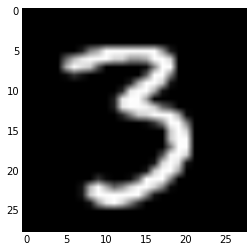

In [9]:
import numpy as np
idx = np.random.randint(0,60000) # we have 60000 images in the training dataset
img = dataset.train.data[idx,:,:,0]
lbl = dataset.train.labels[idx]
imshow(img,cmap='gray')
print 'index:',idx,'\t','label:',lbl

# Train the network
- It's very easy to train a network, just use `fit` function, which is a bit like `sklearn`
- If you want to record some information during training, you can define a monitor, and plug it onto the network
- The default monitor would only print some information every 10 steps.

In [10]:
net.monitor

{'default': DefaultMonitor(net,interval=10)}

- now we change the print step to 20, and add a monitor that record the variance of each layer's input and output.

In [11]:
from tfs.core.monitor import *
net.monitor['default'].interval=20
net.monitor['var'] = InputVarMonitor(net,interval=10)

In [12]:
net.fit(dataset,batch_size=200,n_epoch=1)

step 20. loss 1.242493, test accuracy:0.604000
step 40. loss 0.538240, test accuracy:0.843900
step 60. loss 0.268433, test accuracy:0.906300
step 80. loss 0.267693, test accuracy:0.924000
step 100. loss 0.147162, test accuracy:0.938700
step 120. loss 0.214529, test accuracy:0.943500
step 140. loss 0.188704, test accuracy:0.948500
step 160. loss 0.142271, test accuracy:0.956500
step 180. loss 0.125045, test accuracy:0.958100
step 200. loss 0.169005, test accuracy:0.958600
step 220. loss 0.057160, test accuracy:0.960500
step 240. loss 0.126081, test accuracy:0.955800
step 260. loss 0.120191, test accuracy:0.965200
step 280. loss 0.126913, test accuracy:0.960000
step 300. loss 0.200582, test accuracy:0.964700


In [13]:
var_result = net.monitor['var'].results

In [14]:
import pandas as pd
var = pd.DataFrame(var_result,columns=[n.name for n in net.nodes])

In [15]:
var

,conv1,pool1,conv2,pool2,ip1,ip2,prob
0,6425.205566,884.172607,870.667053,20.216942,48.373428,24.178543,185.626343
1,5865.723145,750.650269,741.516968,1.713232,5.031926,2.161596,8.766542
2,6403.899414,801.773499,791.315186,1.083681,3.336022,1.495037,7.185694
3,6754.935547,850.664795,836.019714,2.209933,6.613290,2.953002,16.670652
4,5987.695312,738.954346,720.794250,2.566571,7.603240,3.403622,23.446896
5,6173.811523,755.805420,740.013123,2.356189,7.057167,3.209060,21.709549
6,5914.882324,726.857361,703.972412,2.965483,8.793136,3.975030,26.592695
7,6053.884766,740.251587,724.703308,3.120707,9.192838,4.111133,27.530441
8,5786.568359,703.444580,689.538330,3.046938,8.754944,4.103434,28.578091
9,6716.635742,843.419128,820.686157,4.263759,12.111746,5.531012,42.637585
